Sun, Keanna Louie


## Spam Classification Filter w/ Naive Bayes

In [1]:
##### Standard Libraries #####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

##### For Preprocessing #####
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import PolynomialFeatures, scale

##### For Building the Model #####
#from sklearn.linear_model import LinearRegression, Lasso, Ridge
#from sklearn.pipeline import make_pipeline

##### For Validation of the Model #####
#from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
#from sklearn.model_selection import cross_val_score

##### random module ######
import random

import os


#### email package ####
import email
#from email import parser
from email import message

import string
import re

## Get folders for training and testing
Folders 0-70 are for training, the rest are testing

In [2]:
# Get path of main directory
abs_path = os.path.abspath('')

# lead to data folder
rel_path = "data"

# full directory path
path = os.path.join(abs_path, rel_path)

# get list of folders
folders = [i[0] for i in os.walk(path)]

# for training
training_folders = folders[1:72]

# for testing
testing_folders = folders[72:]


### Opening stop words and labels files

In [3]:
# get stop words
with open("D:\\UPV\\Year 4\\CMSC 197 ML\\Lec6-ProblemSet\\stop_words.txt") as stop_file:
    stopwords = stop_file.read().splitlines()

In [4]:
with open("D:\\UPV\\Year 4\\CMSC 197 ML\\Lec6-ProblemSet\\labels") as labels_file:
    labels = labels_file.read().splitlines()

## Define functions for pre-processing

def get_email_body(file)
- getting the body of the email from MIME formatted file using email package


def clean_data(body)
- split email body into list of words
- remove the non alphanumeric characters, punctuations from each word
- also remove empty words from the list


def remove_stop_words(list_of_words):
- using the stop words file opened earlier, remove the stop words from the cleaned list of words


def count_ocurrences(list_of_words):
- make the list of words into a dataframe, and combine it into the existing dataframe for counting ocurrences
- identify whether the email is considered as spam or ham


NOTE: make separate global dataframes for spam and ham counts

In [62]:
def get_email_body(file):
    msg = email.message_from_file(f)
    body = msg.get_payload()
    return body

In [63]:
def clean_data(body):
    # get payload may return a stirng or a list of Message objects which usually contain only 1
    if type(body) == str:
        list_words = body.split()
    else:
        new_body = body[0]
        list_words = new_body.as_string().split()
    
    for i in range(len(list_words)):
        # replace word in the list with its clean version
        list_words[i] = re.sub(r'\W+', '', list_words[i].translate(list_words[i].maketrans('', '', string.punctuation)).lower())
    
    # remove empty items
    new_list = [word for word in list_words if len(word) != 0]
    return new_list

In [64]:
def remove_stop_words(word_list):
    global stopwords
    copy_list = word_list.copy()
    for word in copy_list:
        if word in stopwords:
            word_list.remove(word)
    return word_list

In [65]:
# this is for counting occurrences fo words and combining in one df
def count_ocurrences(word_list):
    global count_df

    # make the list of words into a df with its count
    word_df = pd.value_counts(np.array(word_list))
    
    # concatenate the dfs
    count_df = pd.concat([count_df, word_df])


## Loop for Pre-processing

Call the defined fucntions above for each email file

In [81]:
count_df = pd.Series(dtype=int)

In [78]:
# combined ham and spam count words
#count_df = pd.DataFrame(columns=["Word", "Count"])

In [82]:
for folder in training_folders:
    email_files = os.listdir(folder)
    print(folder)
    for i in range(len(email_files)):
        # get path of current email file
        file_path = os.path.join(folder, email_files[i])
        # print(file_path)
        f = open(file_path, 'r', encoding='utf-8', errors='replace')
        
        # getting email body and cleaning
        body = get_email_body(f)
        word_list = clean_data(body)
        word_list = remove_stop_words(word_list)
        
        count_ocurrences(word_list)
        
        f.close()

# get rid of duplicates and make into df
count_df = count_df.rename_axis('Word').reset_index(name="Count")
count_df = count_df.groupby('Word', as_index=False).agg({'Count': 'sum'})

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018
D:\UPV\Year 4\CMSC 197 ML\Lec6-

In [83]:
count_df

,Word,Count
0,0,2253
1,00,139
2,000,895
3,0000,219
4,00000,6
...,...,...
154604,𝗔𝖻𝗎𝗌𝖾𝗋𝗌,1
154605,𝗔𝗅𝗉𝗁𝖺𝖻𝖾𝗍𝗌,1
154606,𝗔𝗇𝗈𝗇𝗒𝗆𝗈𝗎𝗌,1
154607,𝗠𝖺𝗍𝗁,1


In [84]:
# sorting combined emails
sorted_count = count_df.sort_values(by="Count", ascending=False)
sorted_count

,Word,Count
10712,20,14607
40258,bb,14490
137053,td,14268
139676,tr,11699
147426,will,11427
...,...,...
12121,211739,1
12122,211801,1
12123,211839,1
12124,211904,1


In [85]:
top_10000_words_df = sorted_count[['Word', 'Count']][:10000].reset_index(drop=True)
top_10000_words_df

,Word,Count
0,20,14607
1,bb,14490
2,td,14268
3,tr,11699
4,will,11427
...,...,...
9995,eylیzɋâdɋǘvb,24
9996,eɉăb,24
9997,vuitton,24
9998,eɖɘaȃb,24


In [86]:
top_10000_words = list(top_10000_words_df.Word)

## Making feature matrices
- Separate emails into ham and spam, create a matrix for each category where each word has its own column
- if word is found in email body, it takes a value of 1, otherwise 0
- also take note of total number of word occurrences in ham and spam

In [102]:
# lists that will hold all the 0 and 1 values of spam and ham
spam_values = []
ham_values = []

In [103]:
# for counting how many ham and spam emails
total_spam = 0
total_ham = 0

In [104]:
# iterate through all emails
folder_count = 0
#spam_word_total1 = 0
#ham_word_total1 = 0

for folder in training_folders:
    print(folder)
    email_files = os.listdir(folder)
    for i in range(len(email_files)):
        file_path = os.path.join(folder, email_files[i])
        #print(file_path)
        f = open(file_path, 'r', encoding='utf-8', errors='replace')
        
        # getting email body 
        body = get_email_body(f)
        word_list = clean_data(body)
        word_list = remove_stop_words(word_list)
        word_list_copy = word_list.copy()
        
        # check if email is ham or spam
        if "spam" in labels[i + (folder_count*300)]:
            spam_or_ham = "spam"
            total_spam = total_spam + 1
        else:
            spam_or_ham = "ham"
            total_ham = total_ham + 1
        
        # an in-loop list that will hold the 0 and 1 values of current email
        email_values = []
        
        # loop through top 10000 common words
        for word in top_10000_words:
            # check if word is in the email body
            if (word in word_list):
                value = 1
            else:
                value = 0
            
            # add value to the list of values
            email_values.append(value)
        
        for word in word_list_copy:
            if word not in top_10000_words:
                word_list.remove(word)
        
        # combine the current email values to its respective category
        if spam_or_ham == "spam":
            spam_values.append(email_values)
            #spam_word_total1 = spam_word_total1 + len(word_list)    
        else:
            ham_values.append(email_values)
            #ham_word_total1 = ham_word_total1 + len(word_list) 
   
        f.close()
    
    folder_count = folder_count + 1

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018
D:\UPV\Year 4\CMSC 197 ML\Lec6-

In [106]:
spam_feature_matrix = pd.DataFrame(spam_values, columns=top_10000_words)
spam_feature_matrix

,20,bb,td,tr,will,contenttype,contenttransferencoding,textplain,1,br,...,classmsonormal,tdif,align3d,translated,wb,eylیzɋâdɋǘvb,eɉăb,vuitton,eɖɘaȃb,恚bb
0,0,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13772,0,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13773,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13774,0,0,0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
13775,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [107]:
ham_feature_matrix = pd.DataFrame(ham_values, columns=top_10000_words)
ham_feature_matrix

,20,bb,td,tr,will,contenttype,contenttransferencoding,textplain,1,br,...,classmsonormal,tdif,align3d,translated,wb,eylیzɋâdɋǘvb,eɉăb,vuitton,eɖɘaȃb,恚bb
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7518,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7519,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7520,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7521,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Computing Priors

Get probabilities of ham and spam emails based on total number of emails in training set

In [109]:
# get total number of emails
total_emails = len(spam_feature_matrix) + len(ham_feature_matrix) #21300
total_emails

21300

In [110]:
# probability that an email is spam
prob_spam = total_spam / total_emails
prob_spam

0.6468075117370892

In [111]:
# probability that an email is ham
prob_ham = total_ham / total_emails
prob_ham

0.3531924882629108

## Computing likelihood of each word w/ laplace smoothing

- create separate vectors that sums up the occurrences of each word in spam and ham categories
- compute probability of each word being either a spm or ham word and store in dataframe


In [112]:
# sum up occurrences of each word in spam emails
spam_vector = spam_feature_matrix.sum()
spam_vector

20              1529
bb               988
td               866
tr               870
will            2237
                ... 
eylیzɋâdɋǘvb      24
eɉăb              24
vuitton           22
eɖɘaȃb            24
恚bb               12
Length: 10000, dtype: int64

In [114]:
# sum up occurrences of each word in ham emails
ham_vector = ham_feature_matrix.sum()
ham_vector

20               388
bb                11
td                16
tr                13
will            2304
                ... 
eylیzɋâdɋǘvb       0
eɉăb               0
vuitton            0
eɖɘaȃb             0
恚bb                0
Length: 10000, dtype: int64

In [115]:
# make dataframes that will hold p(c|w) values
prob_spam_words = pd.DataFrame(columns=['Word', 'Probability'])
prob_ham_words = pd.DataFrame(columns=['Word', 'Probability'])

In [116]:
# insert the top 10000 words as rows in each df of each category
prob_spam_words.Word = spam_feature_matrix.columns
prob_ham_words.Word = ham_feature_matrix.columns

In [117]:
# total count of occurrences of all words in each category
spam_word_total = spam_feature_matrix.values.sum()
ham_word_total = ham_feature_matrix.values.sum()

In [119]:
spam_word_total

537167

In [120]:
ham_word_total

377241

In [121]:
lambda_value = 1

In [130]:
# calculate probabilities for spam words --> P(w|S)
probabilities = []
for i in range(len(spam_vector)):
    probability = (spam_vector[i] + lambda_value) / (spam_word_total + lambda_value * len(spam_vector))
    probabilities.append(probability)

In [131]:
prob_spam_words.Probability = probabilities
prob_spam_words

,Word,Probability
0,20,0.002796
1,bb,0.001807
2,td,0.001585
3,tr,0.001592
4,will,0.004090
...,...,...
9995,eylیzɋâdɋǘvb,0.000046
9996,eɉăb,0.000046
9997,vuitton,0.000042
9998,eɖɘaȃb,0.000046


In [132]:
# calculate probabilities for ham words --> P(w|H)
probabilities = []
for i in range(len(ham_vector)):
    probability = (ham_vector[i] + lambda_value) / (ham_word_total + lambda_value * len(ham_vector))
    probabilities.append(probability)

In [133]:
# place probabilities in dataframe
prob_ham_words.Probability = probabilities
prob_ham_words

,Word,Probability
0,20,0.001005
1,bb,0.000031
2,td,0.000044
3,tr,0.000036
4,will,0.005952
...,...,...
9995,eylیzɋâdɋǘvb,0.000003
9996,eɉăb,0.000003
9997,vuitton,0.000003
9998,eɖɘaȃb,0.000003


In [126]:
# check ham and spam count if correct
scount = 0
hcount = 0
for label in labels[:21300]:
    if "spam" in label:
        scount = scount + 1
    else:
        hcount = hcount + 1
print(scount)
print(hcount)

13777
7523


In [135]:
prob_spam_words.Probability.sum()

1.0

In [226]:
prob_spam_words_copy = prob_spam_words.copy()
prob_spam_words_copy = prob_spam_words_copy.set_index('Word').to_dict('index')
prob_spam_words_copy['bb']

{'Probability': 0.0018074920453901642}

In [197]:
prob_ham_words_copy = prob_ham_words.copy()
prob_ham_words_copy = prob_ham_words_copy.set_index('Word').to_dict('index')

## Classifying emails
define function to classify an email as ham or spam given its content

In [212]:
# will accept email MIME files
def classify_email(file):
    # getting email body 
    body = get_email_body(file)
    
    # cleaning email content
    word_list = clean_data(body)
    word_list = remove_stop_words(word_list)
    
    # make words into lowercase
    word_list = [x.lower() for x in word_list]
    
    final_words = []
    
    # check which words are found in our word dictionary and only use those
    for word in word_list:
        if word in top_10000_words:
            final_words.append(word)
    
    # calculate if email is spam or ham 
    # summation of log(c) + log(w|c) for all words
    classify_spam = 0
    classify_ham = 0
    for word in final_words:
        # get p(w|S) and p(w|H)
        #word_prob_spam = prob_spam_words[prob_spam_words['Word'] == word]['Probability'].item() #prob_spam_words.loc[prob_spam_words['Word'] == word, 'Probability'].item()
        #word_prob_ham = prob_ham_words[prob_ham_words['Word'] == word]['Probability'].item()
        
        word_prob_spam = prob_spam_words_copy[word]['Probability']
        word_prob_ham = prob_ham_words_copy[word]['Probability']
        
        classify_spam = classify_spam + (np.log(prob_spam) + np.log(word_prob_spam))
        classify_ham = classify_ham + (np.log(prob_ham) + np.log(word_prob_ham))
        
    if classify_spam > classify_ham:
        #print("Spam")
        return "Spam"
    elif classify_spam < classify_ham:
        #print("Ham")
        return "Ham"
    # there are emails that cannot be opened because of their encoding
    else:
        #print("skipped")
        return "Spam"
    


## Testing the classifier
Use the test set to test the Naive bayes classifier

In [213]:
test_classification = []

In [214]:
for folder in testing_folders:
    email_files = os.listdir(folder)
    print(folder)
    for i in range(len(email_files)):
        file_path = os.path.join(folder, email_files[i])
        f = open(file_path, 'r', encoding='utf-8', errors='replace')
        
        # take note of classification labels
        test_classification.append(classify_email(f))
        
        f.close()

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\071
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\072
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\073
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\074
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\075
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\076
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\077
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\078
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\079
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\080
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\081
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\082
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\083
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\084
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\085
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\086
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\087
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\088
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\089
D:\UPV\Year 4\CMSC 197 ML\Lec6-

## Performance Evaluation
calculate accuracy, precision, and recall

In [ ]:
#len(test_classification)

In [215]:
# get labels of test set
test_labels_real = labels[total_emails:]
true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0

In [216]:
for i in range(len(test_classification)):
    if "spam" in test_labels_real[i] and test_classification[i] == "Spam":
        true_positive = true_positive + 1
    elif "spam" in test_labels_real[i] and test_classification[i] == "Ham":
        false_negative = false_negative + 1
    elif "ham" in test_labels_real[i] and test_classification[i] == "Ham":
        true_negative = true_negative + 1
    elif "ham" in test_labels_real[i] and test_classification[i] == "Spam":
        false_positive = false_positive + 1

In [217]:
print(true_positive)
print(true_negative)
print(false_positive)
print(false_negative)

10977
4686
701
158


In [218]:
accuracy = (true_negative + true_positive) / (true_negative + true_positive + false_positive + false_negative)
precision = true_positive / (true_positive + true_negative)
recall = true_positive / (true_positive + false_positive)

In [219]:
accuracy

0.9480087156518582

In [220]:
precision

0.7008235970120666

In [221]:
recall

0.9399725980476109

## Guide Questions

What is the effect of removing stop words in terms of precision, recall, and accuracy? 
Show a plot or a table of these results.

In [222]:
x_axis = ['Accuracy', 'Precision', 'Recall']
y_axis = [accuracy, precision, recall]

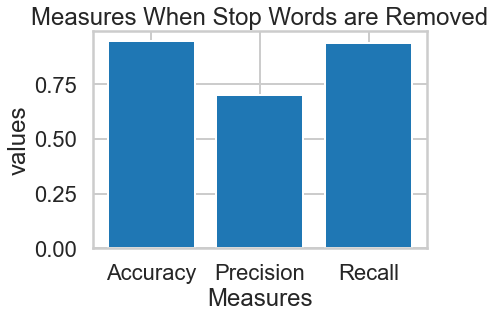

In [223]:
plt.bar(x_axis, y_axis)
plt.title('Measures When Stop Words are Removed')
plt.xlabel('Measures')
plt.ylabel('values')
plt.show()

# other plots were made in another notebook

In [224]:
print(accuracy, precision, recall)

0.9480087156518582 0.7008235970120666 0.9399725980476109


Experiment on the number of words used for training. Filter the dictionary to include only 
words occurring more than k times (1000 words, then k > 100, and k = 50 times). For 
example, the word “offer” appears 150 times, that means that it will be included in the 
dictionary.


For simplicity, I will be testing only on 5 test folders

In [85]:
common_words = top_10000_words[top_10000_words.Count == 50]
common_words

,Word,Count
5564,ab,50.0
5565,transmitted,50.0
5566,textffffff,50.0
5567,nasas,50.0
5568,u9fs,50.0
...,...,...
5737,grants,50.0
5738,opopspanp,50.0
5739,bddb,50.0
5740,reflects,50.0


In [86]:
g2_spam_values = []
g2_ham_values = []

In [87]:
g2_total_spam = 0
g2_total_ham = 0

In [88]:
# iterate through all emails
g2_folder_count = 0
for folder in training_folders:
    email_files = os.listdir(folder)
    print(folder)
    for i in range(len(email_files)):
        file_path = os.path.join(folder, email_files[i])
        #print(file_path)
        f = open(file_path, 'r', encoding='utf-8', errors='ignore')
        
        # getting email body 
        body = get_email_body(f)
        
        # check if email is ham or spam
        if "spam" in labels[i + (g2_folder_count*300)]:
            spam_or_ham = "spam"
            g2_total_spam = g2_total_spam + 1
        else:
            spam_or_ham = "ham"
            g2_total_ham = g2_total_ham + 1
        
        # an in-loop list that will hold the 0 and 1 values of current email
        email_values = []
        
        # loop through top 10000 common words
        for word in common_words['Word']:
            # check if word is in the email body
            if word in body:
                value = 1
            else:
                value = 0
            
            # add value to the list of values
            email_values.append(value)
        
        # combine the current email values to its respective category
        if spam_or_ham == "spam":
            g2_spam_values.append(email_values)
            #spam_feature_matrix = pd.concat([spam_feature_matrix, email_values], ignore_index = True)
        else:
            g2_ham_values.append(email_values)
            #ham_feature_matrix = pd.concat([ham_feature_matrix, email_values], ignore_index = True)
            
        f.close()
    g2_folder_count = g2_folder_count + 1

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\000
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\001
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\002
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\003
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\004
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\005
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\006
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\007
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\008
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\009
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\010
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\011
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\012
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\013
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\014
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\015
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\016
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\017
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\018
D:\UPV\Year 4\CMSC 197 ML\Lec6-

In [89]:
g2_spam_feature_matrix = pd.DataFrame(g2_spam_values, columns=common_words['Word'])
g2_ham_feature_matrix = pd.DataFrame(g2_ham_values, columns=common_words['Word'])

In [90]:
g2_spam_vector = g2_spam_feature_matrix.sum()
g2_ham_vector = g2_ham_feature_matrix.sum()

In [91]:
g2_prob_spam_words = pd.DataFrame(columns=['Word', 'Probability'])
g2_prob_ham_words = pd.DataFrame(columns=['Word', 'Probability'])
g2_prob_spam_words.Word = g2_spam_feature_matrix.columns
g2_prob_ham_words.Word = g2_ham_feature_matrix.columns
g2_spam_word_total = g2_spam_feature_matrix.values.sum()
g2_ham_word_total = g2_ham_feature_matrix.values.sum()

In [92]:
probabilities = []
for i in range(len(g2_spam_vector)):
    probability = (g2_spam_vector[i] + 1) / (g2_spam_word_total + len(g2_spam_vector))
    probabilities.append(probability)
    #print(top_10000_words['Word'][i], probability)
g2_prob_spam_words.Probability = probabilities

In [93]:
probabilities = []
for i in range(len(g2_ham_vector)):
    probability = (g2_ham_vector[i] + 1) / (g2_ham_word_total + len(g2_ham_vector))
    probabilities.append(probability)
    #print(top_10000_words['Word'][i], probability)
g2_prob_ham_words.Probability = probabilities

In [94]:
# will accept email MIME files
def classify_email1(file):
    # getting email body 
    body = get_email_body(file)
    
    # cleaning email content
    word_list = clean_data(body)
    word_list = remove_stop_words(word_list)
    
    # make words into lowercase
    word_list = [x.lower() for x in word_list]
    
    final_words = []
    # check which words are found in our word dictionary and only use those
    for word in word_list:
        if word in list(common_words['Word']):
            final_words.append(word)
    
    # calculate if email is spam or ham 
    # summation of log(c) + log(w|c) for all words
    classify_spam = 0
    classify_ham = 0
    for word in final_words:
        # get p(w|S) and p(w|H)
        word_prob_spam = g2_prob_spam_words.loc[g2_prob_spam_words['Word'] == word, 'Probability'].item()
        word_prob_ham = g2_prob_ham_words.loc[g2_prob_ham_words['Word'] == word, 'Probability'].item()
        
        classify_spam = classify_spam + (np.log(prob_spam) + np.log(word_prob_spam))
        classify_ham = classify_ham + (np.log(prob_ham) + np.log(word_prob_ham))
        
    if classify_spam > classify_ham:
        #print("Spam")
        return "Spam"
    elif classify_spam < classify_ham:
        #print("Ham")
        return "Ham"
    # there are emails that cannot be opened because of their encoding, so assume they are spam
    else:
        print("skipped")
        return "Spam"
    
    #print("Spam:", classify_spam)
    #print("Ham:", classify_ham)
    
    
        #word_in_spam = prob_spam_words.loc[df['Word'] == word]
        #print((prob_spam_words.loc[prob_spam_words['Word'] == word, 'Probability'].item()))

In [95]:
g2_test_classification = []
for folder in testing_folders[:5]:
    email_files = os.listdir(folder)
    print(folder)
    for i in range(len(email_files)):
        file_path = os.path.join(folder, email_files[i])
        #print(file_path)
        f = open(file_path, 'r', encoding='utf-8', errors='replace')
        
        g2_test_classification.append(classify_email1(body))
        
        f.close()

D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\071
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipp

skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
D:\UPV\Year 4\CMSC 197 ML\Lec6-ProblemSet\data\075
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipp

In [96]:
g2_test_labels_real = labels[total_emails:total_emails+1500]
g2_true_positive = 0
g2_true_negative = 0
g2_false_positive = 0
g2_false_negative = 0

In [97]:
for i in range(len(g2_test_classification)):
    #print(test_labels_real)
    if "spam" in g2_test_labels_real[i] and g2_test_classification[i] == "Spam":
        g2_true_positive = g2_true_positive + 1
    elif "spam" in g2_test_labels_real[i] and g2_test_classification[i] == "Ham":
        g2_false_negative = g2_false_negative + 1
    elif "ham" in g2_test_labels_real[i] and g2_test_classification[i] == "Ham":
        g2_true_negative = g2_true_negative + 1
    elif "ham" in g2_test_labels_real[i] and g2_test_classification[i] == "Spam":
        g2_false_positive = g2_false_positive + 1

In [98]:
print(g2_true_positive)
print(g2_true_negative) 
print(g2_false_positive)
print(g2_false_negative)

998
58
439
5


In [99]:
g2_accuracy = (g2_true_negative + g2_true_positive) / (g2_true_negative + g2_true_positive + g2_false_positive + g2_false_negative)
g2_precision = g2_true_positive / (g2_true_positive + g2_true_negative)
g2_recall = g2_true_positive / (g2_true_positive + g2_false_positive)

In [100]:
print(g2_accuracy, g2_precision, g2_recall)

0.704 0.9450757575757576 0.6945024356297843


In [101]:
x_axis = ['Accuracy', 'Precision', 'Recall']
y_axis = [g2_accuracy, g2_precision, g2_recall]

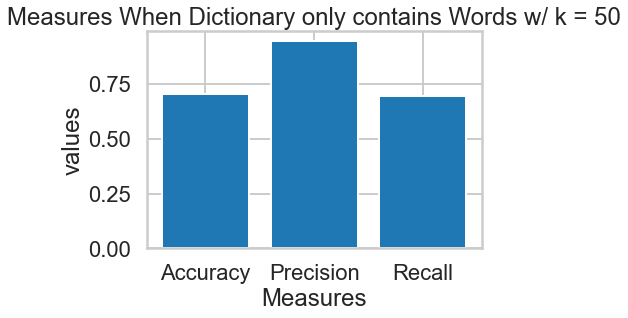

In [102]:
plt.bar(x_axis, y_axis)
plt.title('Measures When Dictionary only contains Words w/ k = 50')
plt.xlabel('Measures')
plt.ylabel('values')
plt.show()


Discuss the results of the different parameters used for Lambda smoothing. Test it on 5 
varying values of the λ (e.g. λ = 2.0, 1.0, 0.5, 0.1, 0.005), Evaluate performance metrics 
for each.

For simplicity, I will be testing on only 5 test folders

What are your recommendations to further improve the model?


To improve the from-scratch model, we should find a way to remove the nonsensical words such as the html code that got converted to strings (ex. tr, td, textplain, contenttype, etc) and email addresses found in an email. We should als find a way to make the model run more efficiently, especially wiht a large number of emails as it takes approx 1-2 hours for the scratch Naive Bayes classifier to run. The data used in the classifier should have been more cleanly extracted or all should have been in the same format and encoding, as there were problems with reading some emails becasue of encoding. 